In [301]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import glob

In [302]:
# check file names
for file in glob.glob('data/*.gz'):
    city = str.title(str(file).split('/')[1].split('_')[0])
    print(file," ",city)

data/eldoret_weather.gz   Eldoret
data/kisumu_weather.gz   Kisumu
data/malindi_weather.gz   Malindi
data/mombasa_weather.gz   Mombasa
data/nairobi_weather.gz   Nairobi


In [303]:
# load files
# create empty dataframe
data = pd.DataFrame()

for file in glob.glob('data/*.gz'):
    try:
        df = pd.read_csv(file,sep=";",skiprows=6,index_col=False,
                 encoding='UTF-8', low_memory=False)
        # rename the first column
        df = df.rename(columns={df.columns[0]:'Time'})
        # get city name & add to dataframe
        city = str.title(str(file).split('/')[1].split('_')[0])
        df.insert(loc=0,column='City',value= city)
        # append df to data
        data = data.append(df,ignore_index=False)
        print(city,"weather data has",df.shape[0],"rows and",df.shape[1], "columns")
    except Exception as e:
        print("Error reading data from this file: ", file, e)

# drop blank column
data = data.drop('Unnamed: 13',axis=1)

Eldoret weather data has 22169 rows and 30 columns
Kisumu weather data has 22554 rows and 30 columns
Malindi weather data has 45445 rows and 15 columns
Mombasa weather data has 24307 rows and 30 columns
Nairobi weather data has 21545 rows and 30 columns


In [304]:
# check shape of data
data.shape

(136020, 33)

In [305]:
# column names
cols = [x for x in data.columns]
print(cols)

['City', 'Time', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'P0', "W'W'", 'c']


In [306]:
# top rows
data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
0,Eldoret,29.12.2020 09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eldoret,29.12.2020 03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Eldoret,29.12.2020 00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
# bottom rows
data.tail(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
21542,Nairobi,19.01.2010 09:00,23.2,NaN,NaN,NaN,57.0,Wind blowing from the east-northeast,5.0,NaN,...,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21543,Nairobi,16.02.2009 15:00,27.0,NaN,NaN,NaN,35.0,Wind blowing from the east-northeast,7.0,NaN,...,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21544,Nairobi,13.02.2009 15:00,26.0,NaN,NaN,NaN,34.0,Wind blowing from the east-northeast,7.0,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136020 entries, 0 to 21544
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   City    136020 non-null  object 
 1   Time    136020 non-null  object 
 2   T       135360 non-null  float64
 3   Po      18208 non-null   float64
 4   P       68847 non-null   float64
 5   Pa      12140 non-null   float64
 6   U       134869 non-null  float64
 7   DD      135242 non-null  object 
 8   Ff      135283 non-null  float64
 9   ff10    56 non-null      float64
 10  ff3     0 non-null       float64
 11  N       90525 non-null   object 
 12  WW      92175 non-null   object 
 13  W1      11134 non-null   object 
 14  W2      11132 non-null   object 
 15  Tn      12694 non-null   float64
 16  Tx      12762 non-null   float64
 17  Cl      87677 non-null   object 
 18  Nh      88378 non-null   object 
 19  H       88842 non-null   object 
 20  Cm      79841 non-null   object 
 21  Ch      608

In [309]:
# calculate % of missing values
percent_missing_vals = np.round(data.isnull().mean()*100,2)
missing_vals_df = pd.DataFrame({'column_name':data.columns,'pct_missing':percent_missing_vals})
missing_vals_df = missing_vals_df.sort_values('pct_missing',ascending=False)
missing_vals_df = missing_vals_df.reset_index(drop=True)
missing_vals_df

,column_name,pct_missing
0,Tg,100.00
1,ff3,100.00
2,E,100.00
3,sss,99.99
4,E',99.99
5,ff10,99.96
6,W'W',99.02
7,W2,91.82
8,W1,91.81
9,Pa,91.07


In [310]:
# select columns with more than
# 94% missing data
cols_to_drop = [x for x in missing_vals_df[missing_vals_df['pct_missing']>94]['column_name']]
print(cols_to_drop)

# data = data.drop(cols_to_drop,axis=1)
# data.head()

['Tg', 'ff3', 'E', 'sss', "E'", 'ff10', "W'W'"]


In [311]:
data[data['City']=='Nyeri'].head()

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c


### Temperature Analysis

In [312]:
# split time into date & time
clean_data = data.copy()
clean_data[['Date','Time']] = clean_data['Time'].str.split(" ",expand=True)

# clean date
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['Day'] = clean_data['Date'].dt.day

In [313]:
clean_data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Tg,E',sss,P0,W'W',c,Date,Year,Month,Day
0,Eldoret,09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29
1,Eldoret,03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29
2,Eldoret,00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29


In [314]:
clean_data['T'] = clean_data['T'].fillna(clean_data['T'].mean())

##### Summarize Temperature by Date

In [315]:
city_temp_by_date = clean_data.groupby(['City','Date'])['T'].mean().rename('Temp').reset_index()
city_temp_by_date = city_temp_by_date.sort_values(by=['City','Date'], ascending=True)
city_temp_by_date.head()

,City,Date,Temp
0,Eldoret,2009-02-13,25.500000
1,Eldoret,2009-02-16,25.600000
2,Eldoret,2010-01-02,20.683333
3,Eldoret,2010-01-03,17.150000
4,Eldoret,2010-01-07,17.700000


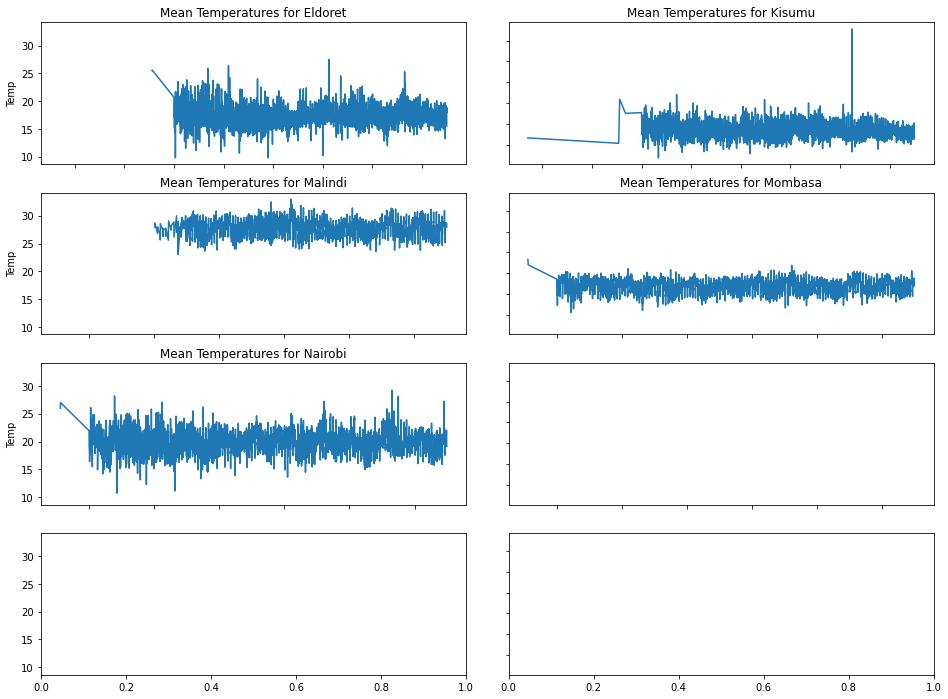

In [316]:
# plot mean temperatures by city
cities = [x for x in city_temp_by_date['City'].unique()]

fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(4, 2, hspace=0.2, wspace=0.1)
(ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7,ax8) = gs.subplots(sharey='col',sharex='row')

# get axes list
axes_list = [x for x in fig.axes]

# plot data
for i in range(len(cities)):
    filtered_data = city_temp_by_date[city_temp_by_date['City']==cities[i]]
    sns.lineplot(x='Date',y='Temp',data = filtered_data,ax=axes_list[i])
    axes_list[i].set_title('Mean Temperatures for ' + cities[i])


# remove inside labels
for ax in axes_list:
    ax.label_outer()

#### Summarize Temperatures by Month

In [317]:
city_temp_by_month = clean_data.groupby(['City','Year','Month'])['T'].mean().rename('Temp').reset_index()
city_temp_by_month = city_temp_by_month.sort_values(by=['City','Year','Month'], ascending=True)
city_temp_by_month.head()

,City,Year,Month,Temp
0,Eldoret,2009,2,25.550000
1,Eldoret,2010,1,17.084211
2,Eldoret,2010,2,18.089322
3,Eldoret,2010,3,18.234474
4,Eldoret,2010,4,17.866935


In [318]:
# mean temperatures by month
mean_temp_by_month = clean_data.groupby(['City','Year'])['T'].mean().rename('Temp').reset_index()
mean_temp_by_month = mean_temp_by_month.sort_values(by=['City','Year'], ascending=True)
mean_temp_by_month.head()
# mean_temp_by_month = mean_temp_by_month[mean_temp_by_month['Year']>=2010]

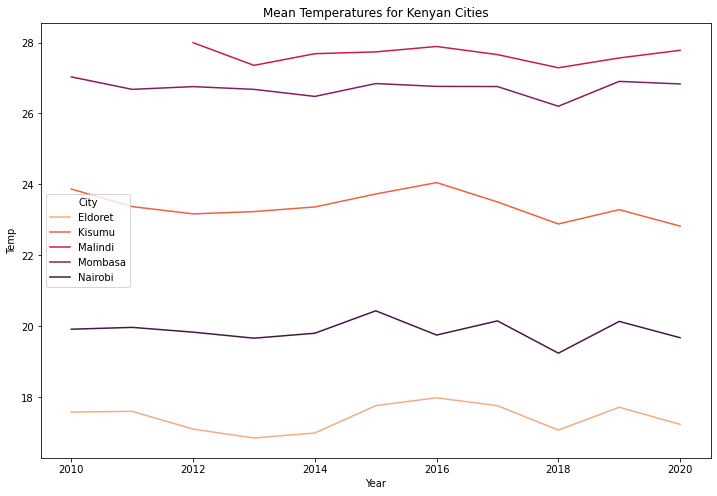

In [319]:
# plot distribution
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='Year',y='Temp',hue='City',palette='rocket_r',data=mean_temp_by_month,ax=ax)
plt.title('Mean Temperatures for Kenyan Cities')
plt.show()

In [320]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r',
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
    'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

IndentationError: unexpected indent (<ipython-input-320-7f677dd1176c>, line 18)